In [2]:
# Copyright (C) 2024 Richard Stiskalek
# This program is free software; you can redistribute it and/or modify it
# under the terms of the GNU General Public License as published by the
# Free Software Foundation; either version 3 of the License, or (at your
# option) any later version.
#
# This program is distributed in the hope that it will be useful, but
# WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the GNU General
# Public License for more details.
#
# You should have received a copy of the GNU General Public License along
# with this program; if not, write to the Free Software Foundation, Inc.,
# 51 Franklin Street, Fifth Floor, Boston, MA  02110-1301, USA.
from os.path import exists
import numpy as np
import matplotlib.pyplot as plt
from corner import corner
from getdist import plots
import scienceplots
from os.path import exists
import seaborn as sns


from reconstruction_comparison import *

%load_ext autoreload
%autoreload 2
%matplotlib inline

paths = csiborgtools.read.Paths(**csiborgtools.paths_glamdring)
fdir = "/mnt/extraspace/rstiskalek/csiborg_postprocessing/peculiar_velocity"

## Quick checks

In [ ]:
catalogue = "CF4_TFR_i"
simname = "IndranilVoid_exp"
zcmb_max=0.05
sample_beta = None
no_Vext = True

fname = paths.flow_validation(
    fdir, simname, catalogue, inference_method="bayes",
    sample_alpha=False, sample_beta=sample_beta,
    no_Vext=no_Vext, zcmb_max=zcmb_max)


In [ ]:
X = samples_to_getdist(get_samples(fname, False), "Test")

In [ ]:
params = ["rLG", "sigma_v"]


# params = ["beta", f"a_{catalogue}", f"b_{catalogue}", f"e_mu_{catalogue}"]
# params = ["Vmag", "l", "b", "sigma_v", "beta", f"mag_cal_{catalogue}", f"alpha_cal_{catalogue}", f"beta_cal_{catalogue}", f"e_mu_{catalogue}"]

with plt.style.context("science"):
    g = plots.get_subplot_plotter()
    g.settings.figure_legend_frame = False
    g.settings.alpha_filled_add = 0.75
    
    g.triangle_plot(X, params=params, filled=True, legend_loc='upper right')
    plt.gcf().suptitle(catalogue_to_pretty(catalogue), y=1.025)
    plt.gcf().tight_layout()
    plt.gcf().show()
    # plt.gcf().savefig(f"../../plots/method_comparison_{simname}_{catalogue}.png", dpi=500, bbox_inches='tight')

In [ ]:
# catalogue = ["LOSS", "Foundation"]
catalogue = "CF4_TFR_i"
simname = "IndranilVoid_exp"
zcmb_max = 0.05
sample_alpha = False

fname = paths.flow_validation(
    fdir, simname, catalogue, inference_method="mike",
    sample_mag_dipole=True,
    sample_beta=False,
    sample_alpha=sample_alpha, zcmb_max=zcmb_max)


samples = get_samples(fname, convert_Vext_to_galactic=True)

samples, labels, keys = samples_for_corner(samples)
fig = corner(samples, labels=labels, show_titles=True,
             title_kwargs={"fontsize": 12}, smooth=1)
# fig.savefig("../../plots/test.png", dpi=250)
fig.show()

## Paper plots

### 1. No $V_{\rm ext}$ and no $\beta$

In [ ]:
for simname in ["IndranilVoid_exp", "IndranilVoid_gauss", "IndranilVoid_mb"]:
    X = []
    for catalogue in ["2MTF", "SFI_gals", "CF4_TFR_i", "CF4_TFR_w1"]:

        fname = paths.flow_validation(
            fdir, simname, catalogue, inference_method="bayes",
            sample_alpha=False, sample_beta=None,
            no_Vext=True, zcmb_max=0.05)

        X_i = samples_to_getdist(get_samples(fname, False), catalogue_to_pretty(catalogue))
        X.append(X_i)

    params = ["rLG", "sigma_v"]
    with plt.style.context("science"):
        g = plots.get_subplot_plotter()
        g.settings.figure_legend_frame = False
        g.settings.alpha_filled_add = 0.75

        g.triangle_plot(X, params=params, filled=True, legend_loc='upper right')
        plt.gcf().suptitle(simname_to_pretty(simname), y=1.025)
        plt.gcf().tight_layout()
        plt.gcf().show()
        plt.gcf().savefig(f"../../plots/void_{simname}_noVext_nobeta.png", dpi=500, bbox_inches='tight')

### 2. No  $V_{\rm ext}$ but sampling $\beta$

In [ ]:
for simname in ["IndranilVoid_exp", "IndranilVoid_gauss", "IndranilVoid_mb"]:
    X = []
    for catalogue in ["2MTF", "SFI_gals", "CF4_TFR_i", "CF4_TFR_w1"]:

        fname = paths.flow_validation(
            fdir, simname, catalogue, inference_method="bayes",
            sample_alpha=False, sample_beta=True,
            no_Vext=True, zcmb_max=0.05)

        X_i = samples_to_getdist(get_samples(fname, False), catalogue_to_pretty(catalogue))
        X.append(X_i)

    params = ["rLG", "sigma_v", "beta"]
    with plt.style.context("science"):
        g = plots.get_subplot_plotter()
        g.settings.figure_legend_frame = False
        g.settings.alpha_filled_add = 0.75

        g.triangle_plot(X, params=params, filled=True, legend_loc='upper right')
        plt.gcf().suptitle(simname_to_pretty(simname), y=1.025)
        plt.gcf().tight_layout()
        plt.gcf().show()
        plt.gcf().savefig(f"../../plots/void_{simname}_noVext_beta.png", dpi=500, bbox_inches='tight')

### 3. Yes $V_{\rm ext}$ and no $\beta$ 

In [ ]:
for simname in ["IndranilVoid_exp", "IndranilVoid_gauss", "IndranilVoid_mb"]:
    X = []
    for catalogue in ["2MTF", "SFI_gals", "CF4_TFR_i", "CF4_TFR_w1"]:

        fname = paths.flow_validation(
            fdir, simname, catalogue, inference_method="bayes",
            sample_alpha=False, sample_beta=False,
            no_Vext=None, zcmb_max=0.05)

        X_i = samples_to_getdist(get_samples(fname, False), catalogue_to_pretty(catalogue))
        X.append(X_i)

    params = ["rLG", "sigma_v", "Vx", "Vy", "Vz"]
    with plt.style.context("science"):
        g = plots.get_subplot_plotter()
        g.settings.figure_legend_frame = False
        g.settings.alpha_filled_add = 0.75

        g.triangle_plot(X, params=params, filled=True, legend_loc='upper right')
        plt.gcf().suptitle(simname_to_pretty(simname), y=1.025)
        plt.gcf().tight_layout()
        plt.gcf().show()
        plt.gcf().savefig(f"../../plots/void_{simname}_Vext_nobeta.png", dpi=500, bbox_inches='tight')

### 4. Yes $V_{\rm ext}$ and yes $\beta$

In [ ]:
for simname in ["IndranilVoid_exp", "IndranilVoid_gauss", "IndranilVoid_mb"]:
    X = []
    for catalogue in ["2MTF", "SFI_gals", "CF4_TFR_i", "CF4_TFR_w1"]:

        fname = paths.flow_validation(
            fdir, simname, catalogue, inference_method="bayes",
            sample_alpha=False, sample_beta=True,
            no_Vext=None, zcmb_max=0.05)

        X_i = samples_to_getdist(get_samples(fname, False), catalogue_to_pretty(catalogue))
        X.append(X_i)

    params = ["rLG", "sigma_v", "beta", "Vx", "Vy", "Vz"]
    with plt.style.context("science"):
        g = plots.get_subplot_plotter()
        g.settings.figure_legend_frame = False
        g.settings.alpha_filled_add = 0.75

        g.triangle_plot(X, params=params, filled=True, legend_loc='upper right')
        plt.gcf().suptitle(simname_to_pretty(simname), y=1.025)
        plt.gcf().tight_layout()
        plt.gcf().show()
        plt.gcf().savefig(f"../../plots/void_{simname}_Vext_beta.png", dpi=500, bbox_inches='tight')

###  5. $V_{\rm ext}$ along the model axis and $\beta = 1$

File:          /mnt/extraspace/rstiskalek/csiborg_postprocessing/peculiar_velocity/samples_IndranilVoid_exp_2MTF_bayes_zcmb_max_0.05_no_Vext_sample_Vmag_vax.hdf5
Last modified: 27/09/2024 09:39:52
Removed no burn in
File:          /mnt/extraspace/rstiskalek/csiborg_postprocessing/peculiar_velocity/samples_IndranilVoid_exp_SFI_gals_bayes_zcmb_max_0.05_no_Vext_sample_Vmag_vax.hdf5
Last modified: 27/09/2024 10:11:18
Removed no burn in
File:          /mnt/extraspace/rstiskalek/csiborg_postprocessing/peculiar_velocity/samples_IndranilVoid_exp_CF4_TFR_i_bayes_zcmb_max_0.05_no_Vext_sample_Vmag_vax.hdf5
Last modified: 27/09/2024 10:01:14
Removed no burn in
File:          /mnt/extraspace/rstiskalek/csiborg_postprocessing/peculiar_velocity/samples_IndranilVoid_exp_CF4_TFR_w1_bayes_zcmb_max_0.05_no_Vext_sample_Vmag_vax.hdf5
Last modified: 27/09/2024 10:01:20
Removed no burn in


/tmp/ipykernel_2151114/3148255757.py:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.gcf().tight_layout()


File:          /mnt/extraspace/rstiskalek/csiborg_postprocessing/peculiar_velocity/samples_IndranilVoid_gauss_2MTF_bayes_zcmb_max_0.05_no_Vext_sample_Vmag_vax.hdf5
Last modified: 27/09/2024 09:46:13
Removed no burn in
File:          /mnt/extraspace/rstiskalek/csiborg_postprocessing/peculiar_velocity/samples_IndranilVoid_gauss_SFI_gals_bayes_zcmb_max_0.05_no_Vext_sample_Vmag_vax.hdf5
Last modified: 27/09/2024 10:27:30
Removed no burn in
File:          /mnt/extraspace/rstiskalek/csiborg_postprocessing/peculiar_velocity/samples_IndranilVoid_gauss_CF4_TFR_i_bayes_zcmb_max_0.05_no_Vext_sample_Vmag_vax.hdf5
Last modified: 27/09/2024 10:09:19
Removed no burn in
File:          /mnt/extraspace/rstiskalek/csiborg_postprocessing/peculiar_velocity/samples_IndranilVoid_gauss_CF4_TFR_w1_bayes_zcmb_max_0.05_no_Vext_sample_Vmag_vax.hdf5
Last modified: 27/09/2024 09:56:52


Removed no burn in


/tmp/ipykernel_2151114/3148255757.py:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.gcf().tight_layout()


File:          /mnt/extraspace/rstiskalek/csiborg_postprocessing/peculiar_velocity/samples_IndranilVoid_mb_2MTF_bayes_zcmb_max_0.05_no_Vext_sample_Vmag_vax.hdf5
Last modified: 27/09/2024 10:01:37
Removed no burn in
File:          /mnt/extraspace/rstiskalek/csiborg_postprocessing/peculiar_velocity/samples_IndranilVoid_mb_SFI_gals_bayes_zcmb_max_0.05_no_Vext_sample_Vmag_vax.hdf5
Last modified: 27/09/2024 10:18:28
Removed no burn in
File:          /mnt/extraspace/rstiskalek/csiborg_postprocessing/peculiar_velocity/samples_IndranilVoid_mb_CF4_TFR_i_bayes_zcmb_max_0.05_no_Vext_sample_Vmag_vax.hdf5
Last modified: 27/09/2024 10:23:29
Removed no burn in
File:          /mnt/extraspace/rstiskalek/csiborg_postprocessing/peculiar_velocity/samples_IndranilVoid_mb_CF4_TFR_w1_bayes_zcmb_max_0.05_no_Vext_sample_Vmag_vax.hdf5
Last modified: 27/09/2024 10:40:41
Removed no burn in


/tmp/ipykernel_2151114/3148255757.py:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.gcf().tight_layout()


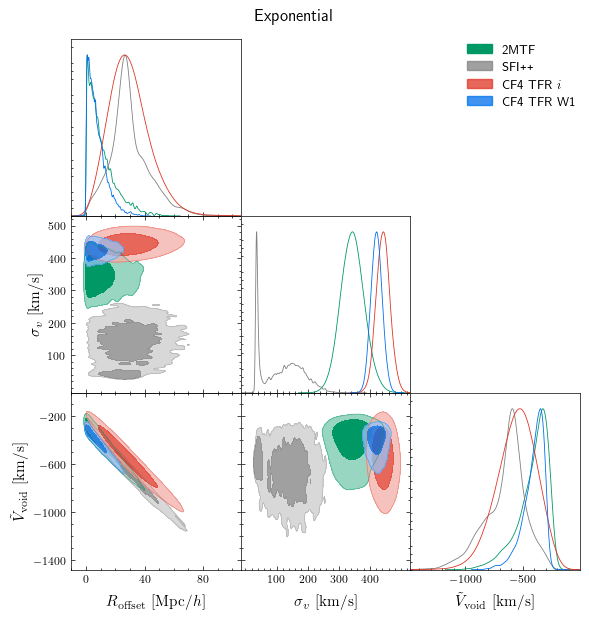

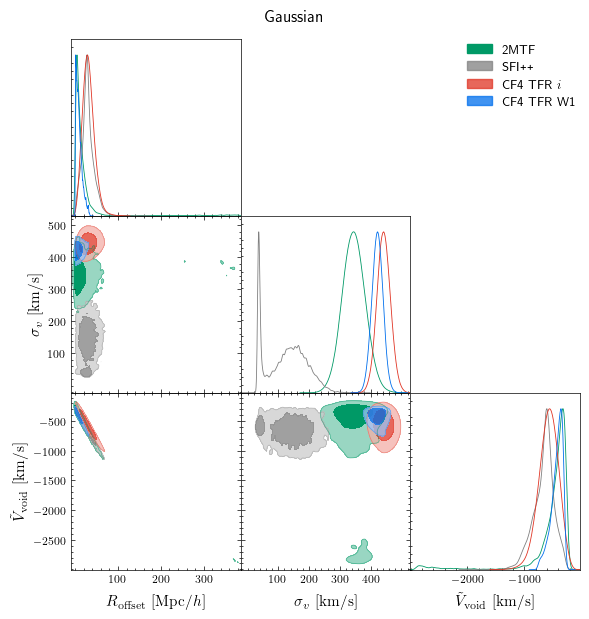

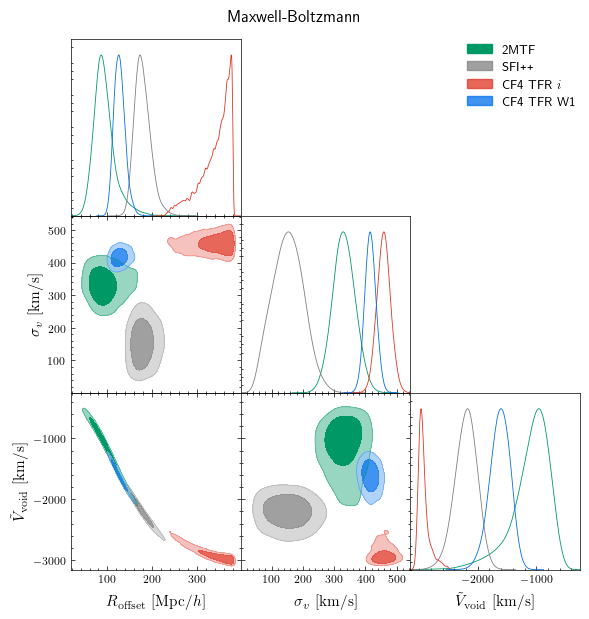

In [10]:
def profile2vvoid(profile):
    if "mb" in profile:
        return 1586
    elif "gauss" in profile:
        return 2018
    elif "exp" in profile:
        return 2307
    else:
        raise ValueError("Invalid profile")


for simname in ["IndranilVoid_exp", "IndranilVoid_gauss", "IndranilVoid_mb"]:
    X = []
    for catalogue in ["2MTF", "SFI_gals", "CF4_TFR_i", "CF4_TFR_w1"]:

        fname = paths.flow_validation(
            fdir, simname, catalogue, inference_method="bayes",
            sample_alpha=False, sample_beta=None,
            no_Vext=True, zcmb_max=0.05, sample_Vmag_vax=True)

        Xi = get_samples(fname, False)
        Xi["Vvoid"] = Xi["Vext_axis_mag"] - profile2vvoid(simname)

        X_i = samples_to_getdist(Xi, catalogue_to_pretty(catalogue))

        X.append(X_i)

    params = ["rLG", "sigma_v", "Vvoid"]
    with plt.style.context("science"):
        g = plots.get_subplot_plotter()
        g.settings.figure_legend_frame = False
        g.settings.alpha_filled_add = 0.75

        g.triangle_plot(X, params=params, filled=True, legend_loc='upper right')
        plt.gcf().suptitle(simname_to_pretty(simname), y=1.025)
        plt.gcf().tight_layout()
        plt.gcf().show()
        plt.gcf().savefig(f"../../plots/void_{simname}_Vext_along_axis_no_beta.png", dpi=500, bbox_inches='tight')